## 1. Dataset overview
I had downloaded this dataset from Kaggle. the link is "https://www.kaggle.com/datasets/examsgovt/sme-financial-decision-risk-prediction-dataset?resource=download&select=financial_dataset_SME.csv" .

This dataset contains financial and operational metrics of small and medium enterprises. the target variable represents the financial risk level or loan decision status.

## 2. Problem Statement

The objective is to predict if the SMEs would be able to repay the loan amount back within the time period given.

## 3. Business Relevance

This helps banks reduce loan defaults, helps financial institutions minimize credit risk and improve automated underwriting decisions.

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("/content/financial_dataset_SME.csv")

In [8]:
df

,Has_Financial_Questions,SME_Age,SME_Type,Industry_Sector,SME_Size_Category,Literacy_Accounting,Literacy_Budgeting,Literacy_Investment_Evaluation,Literacy_Credit_Knowledge,Risk_Awareness,...,Decision_Capital_Allocation,Decision_CashFlow_Management,Analysis_Accounting_Tools,Analysis_Financial_Ratios,Analysis_Forecasting,Analysis_Benchmarking,Liquidity_Stability,Uses_Digital_Finance,Annual_Revenue_Category,Financial_Distress
0,YES,21.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,6.000000,0.000000,...,6.000000,5.000000,3.000000,5.000000,3.000000,5.000000,6.000000,0.000000,2.000000,0
1,YES,29.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,3.000000,2.000000,8.000000,3.000000,5.000000,3.000000,0.000000,2.000000,0
2,YES,29.000000,2.000000,1.000000,3.000000,3.000000,3.000000,5.000000,5.000000,7.000000,...,1.000000,3.000000,3.000000,2.000000,5.000000,5.000000,7.000000,0.000000,4.000000,1
3,YES,6.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,6.000000,9.000000,...,3.000000,5.000000,4.000000,7.000000,5.000000,5.000000,4.000000,0.000000,2.000000,1
4,YES,12.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,6.000000,9.000000,...,4.000000,3.000000,3.000000,5.000000,3.000000,5.000000,6.000000,0.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,YES,2.609984,2.219968,2.000000,2.609984,2.390016,2.609984,4.609984,4.780032,2.609984,...,7.609984,3.390016,2.390016,4.609984,4.219968,2.780032,0.000000,1.000000,2.219968,0
15102,YES,25.000000,3.000000,3.406606,1.813212,2.000000,2.186788,2.593394,0.406606,6.593394,...,1.813212,3.406606,3.000000,8.000000,4.593394,3.593394,1.593394,0.406606,1.000000,0
15103,YES,18.576967,2.000000,3.269098,2.000000,3.000000,3.000000,3.000000,0.000000,5.269098,...,4.000000,3.000000,3.576967,0.846065,3.000000,3.153935,2.846065,0.576967,0.000000,0
15104,YES,8.695651,3.152175,4.000000,3.847825,2.847825,3.000000,5.000000,0.000000,3.847825,...,6.847825,3.152175,3.000000,6.000000,2.456524,3.152175,3.152175,0.152175,0.847825,0


In [9]:
df.shape

(15106, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15106 entries, 0 to 15105
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Has_Financial_Questions         15106 non-null  object 
 1   SME_Age                         15106 non-null  float64
 2   SME_Type                        15106 non-null  float64
 3   Industry_Sector                 15106 non-null  float64
 4   SME_Size_Category               15106 non-null  float64
 5   Literacy_Accounting             15106 non-null  float64
 6   Literacy_Budgeting              15106 non-null  float64
 7   Literacy_Investment_Evaluation  15106 non-null  float64
 8   Literacy_Credit_Knowledge       15106 non-null  float64
 9   Risk_Awareness                  15106 non-null  float64
 10  Risk_Evaluation                 15106 non-null  float64
 11  Risk_Mitigation_Strategies      15106 non-null  float64
 12  Risk_Taking_Willingness         

In [11]:
df['Financial_Distress'].value_counts()

,count
Financial_Distress,
0,10000
1,5106


The target variable is "Financial Distress" because it shows the financial stability or distress of the SMEs. It is binary classification.

In [12]:
df.isnull().sum()

,0
Has_Financial_Questions,0
SME_Age,0
SME_Type,0
Industry_Sector,0
SME_Size_Category,0
Literacy_Accounting,0
Literacy_Budgeting,0
Literacy_Investment_Evaluation,0
Literacy_Credit_Knowledge,0
Risk_Awareness,0


No null values present

In [13]:
df.duplicated().sum()

np.int64(0)

No duplicated values present

In [14]:
df.describe()

,SME_Age,SME_Type,Industry_Sector,SME_Size_Category,Literacy_Accounting,Literacy_Budgeting,Literacy_Investment_Evaluation,Literacy_Credit_Knowledge,Risk_Awareness,Risk_Evaluation,...,Decision_Capital_Allocation,Decision_CashFlow_Management,Analysis_Accounting_Tools,Analysis_Financial_Ratios,Analysis_Forecasting,Analysis_Benchmarking,Liquidity_Stability,Uses_Digital_Finance,Annual_Revenue_Category,Financial_Distress
count,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,...,15106.00000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000,15106.000000
mean,14.250213,2.552398,2.987768,2.759196,3.185667,3.188818,4.060329,4.448019,4.261796,2.199486,...,4.38877,3.343770,3.186380,4.437865,4.048117,3.481857,3.817290,0.612946,1.919303,0.338011
std,8.248664,0.938726,1.111138,1.041669,0.963658,0.887659,0.866348,2.817387,2.799492,1.203449,...,2.82193,0.679921,0.854402,2.822406,0.837485,1.072951,2.784985,0.463254,1.371941,0.473048
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,...,2.00000,3.000000,3.000000,2.000000,3.175948,3.000000,1.251306,0.000000,1.000000,0.000000
50%,14.000000,2.600485,3.000000,3.000000,3.000000,3.000000,4.000000,4.180883,4.000000,2.000000,...,4.00000,3.000000,3.000000,4.216257,4.000000,3.178221,3.213111,1.000000,2.000000,0.000000
75%,21.000000,3.000000,4.000000,3.000000,4.000000,4.000000,5.000000,7.000000,7.000000,3.000000,...,7.00000,4.000000,4.000000,7.000000,5.000000,4.000000,6.000000,1.000000,3.000000,1.000000
max,29.000000,4.000000,5.000000,5.000000,10.000000,5.000000,5.000000,9.000000,9.000000,10.000000,...,9.00000,5.000000,5.000000,9.000000,5.000000,10.000000,9.000000,1.000000,4.000000,1.000000


<Axes: >

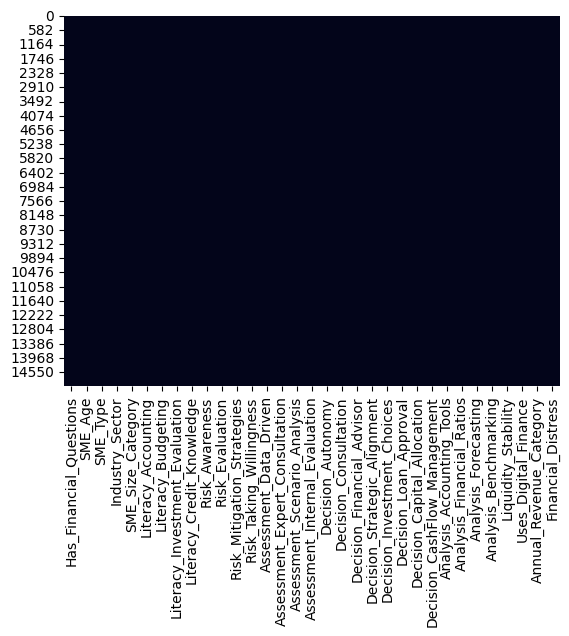

In [15]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [16]:
df['Has_Financial_Questions'].value_counts()

,count
Has_Financial_Questions,
YES,15106


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

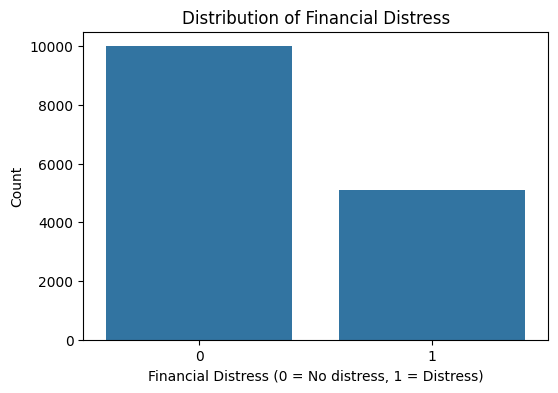

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Financial_Distress",data=df)
plt.title("Distribution of Financial Distress")
plt.xlabel("Financial Distress (0 = No distress, 1 = Distress)")
plt.ylabel("Count")
plt.show()

### Data Preprocessing

In [19]:
df['Has_Financial_Questions'].value_counts()

,count
Has_Financial_Questions,
YES,15106


In [20]:
df["Has_Financial_Questions"].unique()

array(['YES'], dtype=object)

In [21]:
df.drop("Has_Financial_Questions",axis=1,inplace=True)

In [22]:
df

,SME_Age,SME_Type,Industry_Sector,SME_Size_Category,Literacy_Accounting,Literacy_Budgeting,Literacy_Investment_Evaluation,Literacy_Credit_Knowledge,Risk_Awareness,Risk_Evaluation,...,Decision_Capital_Allocation,Decision_CashFlow_Management,Analysis_Accounting_Tools,Analysis_Financial_Ratios,Analysis_Forecasting,Analysis_Benchmarking,Liquidity_Stability,Uses_Digital_Finance,Annual_Revenue_Category,Financial_Distress
0,21.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,6.000000,0.000000,3.000000,...,6.000000,5.000000,3.000000,5.000000,3.000000,5.000000,6.000000,0.000000,2.000000,0
1,29.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000,3.000000,...,0.000000,3.000000,2.000000,8.000000,3.000000,5.000000,3.000000,0.000000,2.000000,0
2,29.000000,2.000000,1.000000,3.000000,3.000000,3.000000,5.000000,5.000000,7.000000,1.000000,...,1.000000,3.000000,3.000000,2.000000,5.000000,5.000000,7.000000,0.000000,4.000000,1
3,6.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,6.000000,9.000000,1.000000,...,3.000000,5.000000,4.000000,7.000000,5.000000,5.000000,4.000000,0.000000,2.000000,1
4,12.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,6.000000,9.000000,3.000000,...,4.000000,3.000000,3.000000,5.000000,3.000000,5.000000,6.000000,0.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,2.609984,2.219968,2.000000,2.609984,2.390016,2.609984,4.609984,4.780032,2.609984,4.000000,...,7.609984,3.390016,2.390016,4.609984,4.219968,2.780032,0.000000,1.000000,2.219968,0
15102,25.000000,3.000000,3.406606,1.813212,2.000000,2.186788,2.593394,0.406606,6.593394,3.000000,...,1.813212,3.406606,3.000000,8.000000,4.593394,3.593394,1.593394,0.406606,1.000000,0
15103,18.576967,2.000000,3.269098,2.000000,3.000000,3.000000,3.000000,0.000000,5.269098,2.576967,...,4.000000,3.000000,3.576967,0.846065,3.000000,3.153935,2.846065,0.576967,0.000000,0
15104,8.695651,3.152175,4.000000,3.847825,2.847825,3.000000,5.000000,0.000000,3.847825,1.000000,...,6.847825,3.152175,3.000000,6.000000,2.456524,3.152175,3.152175,0.152175,0.847825,0


In [23]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index([], dtype='object')


Outlier Checking

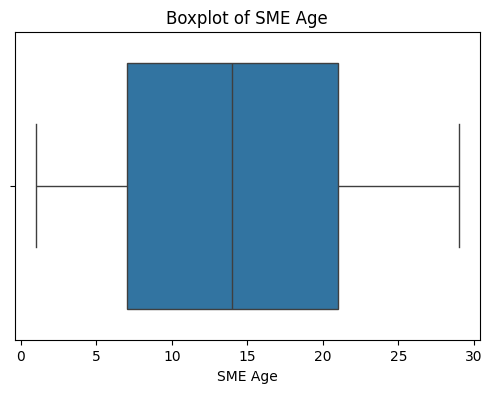

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['SME_Age'])
plt.title("Boxplot of SME Age")
plt.xlabel("SME Age")
plt.show()


Capping method for outliers

In [25]:
Q1 = df['SME_Age'].quantile(0.25)
Q3 = df['SME_Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['SME_Age'] = np.where(df['SME_Age'] > upper_bound, upper_bound,
                         np.where(df['SME_Age'] < lower_bound, lower_bound,
                                  df['SME_Age']))

Feature Scaling

In [26]:
X = df.drop('Financial_Distress', axis=1)
y = df['Financial_Distress']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

### EDA

Distribution Plots

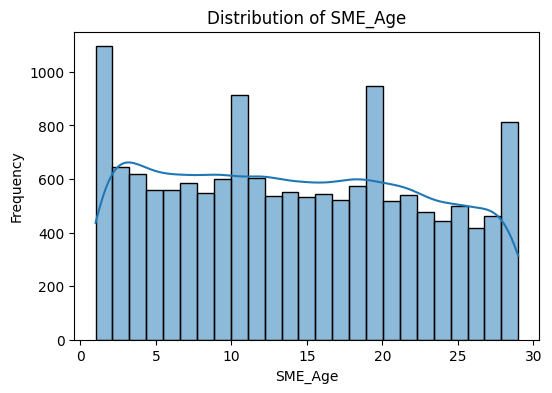

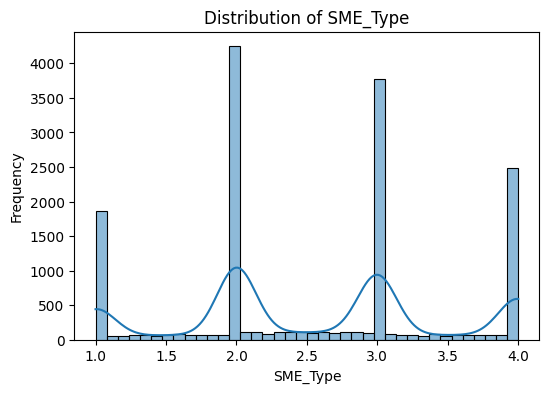

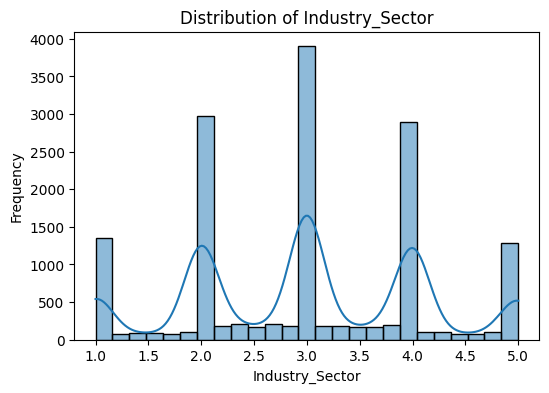

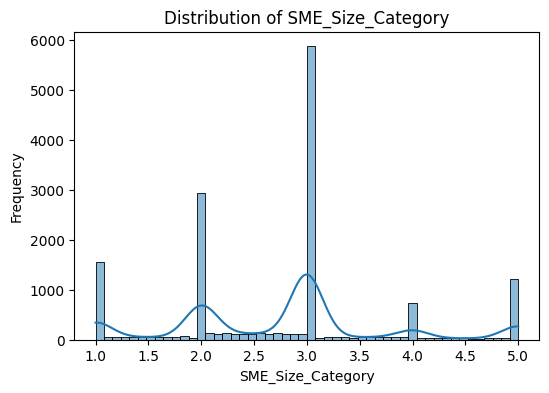

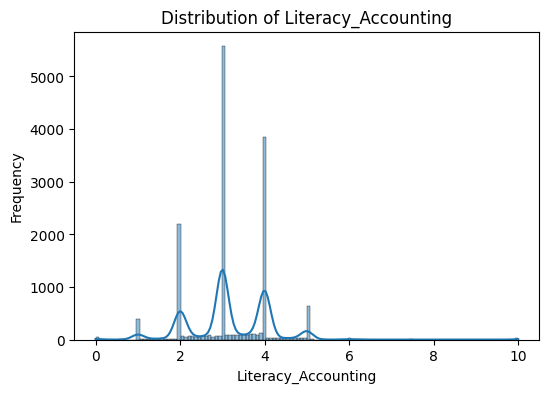

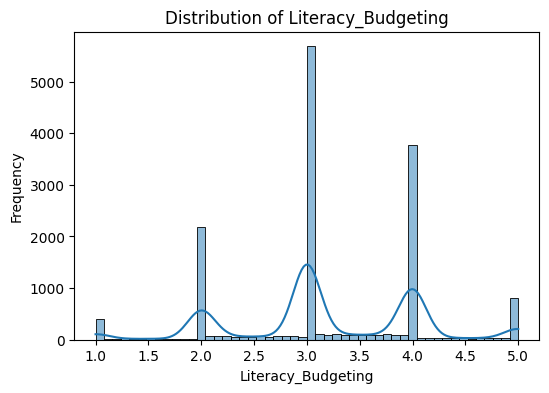

In [28]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols[:6]:  # limit for readability
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Feature vs Target

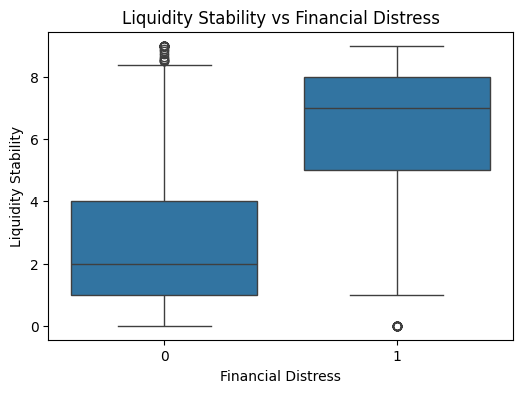

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Financial_Distress', y='Liquidity_Stability', data=df)
plt.title("Liquidity Stability vs Financial Distress")
plt.xlabel("Financial Distress")
plt.ylabel("Liquidity Stability")
plt.show()


Correlation Heatmap

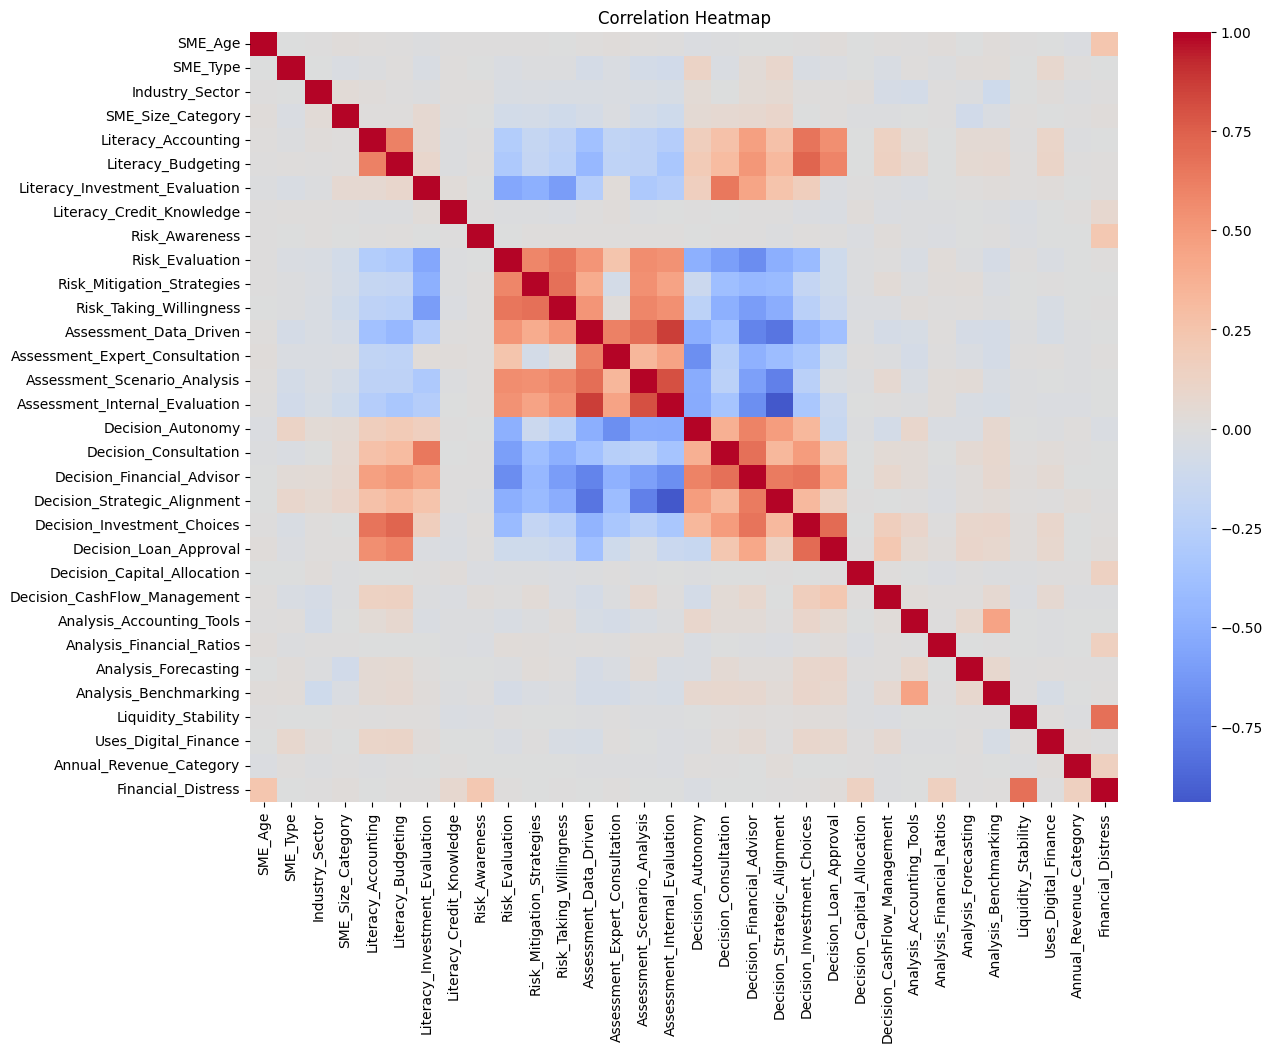

In [30]:
plt.figure(figsize=(14,10))
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


To check strongest correlations with target.

In [31]:
corr['Financial_Distress'].sort_values(ascending=False)


,Financial_Distress
Financial_Distress,1.000000
Liquidity_Stability,0.678897
SME_Age,0.236553
Risk_Awareness,0.223825
Analysis_Financial_Ratios,0.154224
Annual_Revenue_Category,0.153936
Decision_Capital_Allocation,0.144365
Literacy_Credit_Knowledge,0.072892
SME_Size_Category,0.016061
Decision_Loan_Approval,0.015791


Grouped Analysis

In [32]:
df.groupby('Financial_Distress')['Liquidity_Stability'].mean()
df.groupby('Financial_Distress')['Risk_Awareness'].mean()


,Risk_Awareness
Financial_Distress,
0,3.814069
1,5.138660


### Feature Engineering

In [40]:
literacy_cols = [col for col in df.columns if 'Literacy' in col]

df['Financial_Literacy_Index'] = df[literacy_cols].mean(axis=1)


In [34]:
risk_cols = [col for col in df.columns if 'Risk' in col]

df['Risk_Management_Score'] = df[risk_cols].mean(axis=1)


In [41]:
df.corr()['Financial_Distress'].sort_values(ascending=False)


,Financial_Distress
Financial_Distress,1.000000
Liquidity_Stability,0.678897
SME_Age,0.236553
Risk_Awareness,0.223825
Risk_Management_Score,0.163867
Analysis_Financial_Ratios,0.154224
Annual_Revenue_Category,0.153936
Decision_Capital_Allocation,0.144365
Literacy_Credit_Knowledge,0.072892
Financial_Literacy_Index,0.064283


### Model Building

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('Financial_Distress', axis=1)
y = df['Financial_Distress']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.92      0.95      0.94      1021

    accuracy                           0.96      3022
   macro avg       0.95      0.96      0.95      3022
weighted avg       0.96      0.96      0.96      3022

ROC-AUC: 0.9933608122481365


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2001
           1       0.95      0.89      0.92      1021

    accuracy                           0.95      3022
   macro avg       0.95      0.93      0.94      3022
weighted avg       0.95      0.95      0.95      3022

ROC-AUC: 0.9896481729752167


In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    scale_pos_weight = 10000/5106,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2001
           1       0.94      0.94      0.94      1021

    accuracy                           0.96      3022
   macro avg       0.95      0.95      0.95      3022
weighted avg       0.96      0.96      0.96      3022

ROC-AUC: 0.9934332539900471
